# Book Recommender

Hello, this is a book recommender!

This notebook contains two recommenders:
1. Popularity recommender -- recommend the most popular books
2. Similarity recommender -- recommend similar books to desired book
This is an on-going project, more recommenders are under construction.

## Import Libraries

In [1]:
#Data I/O, manipulation
import pandas as pd

#Linear Algebra
import numpy as np

#Create plots
import matplotlib.pyplot as plt

## Load Data

**Dataset Introduction**<br>
Book-Crossings is a book ratings dataset compiled by Cai-Nicolas Ziegler. It contains 1.1 million ratings of 270,000 books by 90,000 users. The ratings are on a scale from 1 to 10.

In [2]:
#load book data
books = pd.read_csv('C:/Users/Ang/Desktop/Notebook projects/Book/BX-Books.csv', sep=';', 
                    error_bad_lines=False, encoding="latin-1") 

#load user data
users = pd.read_csv('C:/Users/Ang/Desktop/Notebook projects/Book/BX-Users.csv', sep=';',
                    error_bad_lines=False, encoding="latin-1")

#load rating data
ratings = pd.read_csv('C:/Users/Ang/Desktop/Notebook projects/Book/BX-Book-Ratings.csv', sep=';',
                    error_bad_lines=False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\conda\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWar

In [3]:
#take a look on data
books.sample(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
253178,0898212820,2000 Taste of Home's Quick Cooking Annual Recipes,Julie Schnittka,2000,"Reiman Publications, L.P.",http://images.amazon.com/images/P/0898212820.0...,http://images.amazon.com/images/P/0898212820.0...,http://images.amazon.com/images/P/0898212820.0...


In [4]:
users.sample(1)

,User-ID,Location,Age
219712,219713,"columbus, ohio, usa",NaN


In [5]:
ratings.sample(1)

,User-ID,ISBN,Book-Rating
633970,153662,0380819090,0


In [6]:
#change books dataset column names
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 
                 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

#change users dataset column names
users.columns = ['userID', 'Location', 'Age']

#change rating dataset column names
ratings.columns = ['userID', 'ISBN', 'bookRating']

## Data Exploration

### Rating Data

In [7]:
#head rows of ratings
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
#shape of dataset
print("Shape of the Rating data: {}".format(ratings.shape))

Shape of the Rating data: (1149780, 3)


Summary: The rating data contains 3 column: userID, ISBN, bookRating. It contains 1149780 rows of ratings.Each row contains a rating score from a given user.

#### Distribution of Ratings

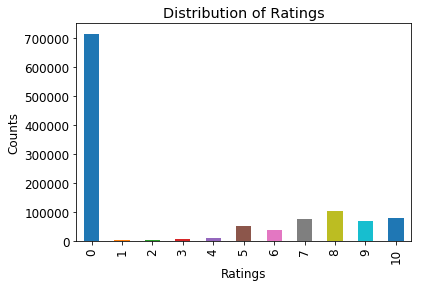

In [9]:
#plot of distribution of ratings

#set font size
plt.rc("font", size = 12)

#bar plot of bookRaing column
ratings['bookRating'].value_counts(sort = False).plot(kind = 'bar')

#title, x,y label
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Counts')

#Display figure
plt.show()

**Summary:**<br>
Most Ratings are 0, the second most is 8. 

### Book Data

In [10]:
#head rows of books
books.head(3)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [11]:
#shape of dataset
print("Shape of the Book data: {}".format(books.shape))

Shape of the Book data: (271360, 8)


### Users data

In [12]:
#head rows of users
users.head(3)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [13]:
#shape of dataset
print("Shape of the User data: {}".format(users.shape))

Shape of the User data: (278858, 3)


#### What`s the age distribution of our users?

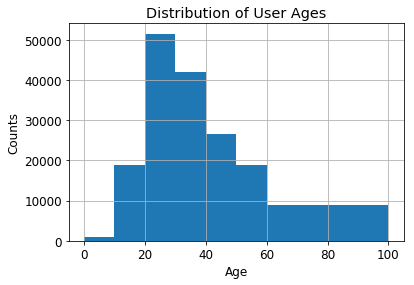

In [14]:
#make bins of age groups
users['Age'].hist(bins = [0, 10, 20, 30, 40, 50, 60, 100])

#title, x,y label
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Counts')

#show plot
plt.show()

## Recommender Systems

### Recommender based on Rating counts

This recommender is non-personlized and only based on the number of ratings. It can be regarded as a popularity-based recommender. 

In [15]:
#count ratings for each book by ISBN
rating_counts = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count().sort_values(ascending = False))

In [16]:
#rename column name
rating_counts.columns = ['ratingCounts']

In [17]:
#Top 10 most rated books
rating_counts.head(10)

,ratingCounts
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723
044023722X,647
0679781587,639
0142001740,615
067976402X,614


In [18]:
#give new index
rating_counts_copy = rating_counts.copy().reset_index()

In [19]:
rating_counts_copy.head()

,ISBN,ratingCounts
0,0971880107,2502
1,0316666343,1295
2,0385504209,883
3,0060928336,732
4,0312195516,723


In [20]:
#merge with books data for full info
books_rating_counts_merged = pd.merge(books, rating_counts_copy, on = 'ISBN' )

In [21]:
#top 5 books with full info
books_rating_counts_merged.sort_values(by = 'ratingCounts', ascending = False).head(5)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,ratingCounts
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,2502
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,1295
748,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,883
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,732
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,723


**Summary**:<br>
The top 5 books that received most ratings are Wild Animus, The Lovely Bones: A Novel, The Da Vinci Code, Divine Secrets of the Ya-Ya Sisterhood: A Novel, The Red Tent (Bestselling Backlist)

### Recommender based on correlations

This recommender is based on the Pearson similarity of books on their ratings. It is not strictly personlized but is more personalized than the first one. 

In [22]:
#calculate average rating for each book
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())

In [23]:
#add a column of rating counts
average_rating['ratingCounts'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())

In [24]:
#check the average rating scores of the top 5 books which received most rates
average_rating.sort_values(by = 'ratingCounts', ascending = False).head(5)

,bookRating,ratingCounts
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


It seems that the most popular book which has the most ratings didn`t receive a good score on ratings. 

#### Filter insignificant users and books

To ensure statistic significance and reduce dimensions, I decide to filter users with ratings less than 200 and book with ratings less than 100.

In [35]:
#count ratings for each user and book
user_count = ratings['userID'].value_counts()
book_count = ratings['ISBN'].value_counts()

In [83]:
#filter users and books
ratings_filtered = ratings[ratings['userID'].isin(user_count[user_count>=200].index)]
ratings_filtered = ratings_filtered[ratings_filtered['ISBN'].isin(book_count[book_count>=100].index)]

In [85]:
#how many rows left
ratings_filtered.shape

(49781, 3)

In [86]:
ratings_filtered.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1469,277427,0060930535,0
1471,277427,0060934417,0
1474,277427,0061009059,9
1484,277427,0140067477,0


#### Rating Matrix

We will be making a rating matrix with users as index and ratings and books as columns. The value will be the corresponding rating that each user rates to each book.<br>

In [88]:
#making rating matrix
ratings_pivot = ratings_filtered.pivot(index = 'userID', columns = 'ISBN').bookRating

In [90]:
#assign index and columns
userID = ratings_pivot.index
ISBN = ratings_pivot.columns

#### Compute Similarity

Since we have the matrix ready, now we can calculate the Pearson Relativity(similarity).

In [117]:
#Assume we want to know what other books are most similar to the 2nd popular book, <The Lovely Bones: A Novel>, ISBN:0316666343

#recommend books similar to <The Lovely Bones: A Novel>, ISBN:0316666343

#get target book
target_book = ratings_pivot['0316666343']

#compute similarity
similarity = ratings_pivot.corrwith(target_book)

#formate the dataframe
similarity_df = pd.DataFrame(similarity, columns = ['PearsonR'])

#drop irrelevent books
similarity_df.dropna(inplace = True)

#get rating counts for each book
similar_books = similarity_df.join(average_rating[['bookRating','ratingCounts']])

#display the top 10 most similar books
similar_books[similar_books['ratingCounts'] >= 300].sort_values('PearsonR', ascending = False).head(10)

,PearsonR,bookRating,ratingCounts
ISBN,,,
0316666343,1.000000,4.468726,1295
0312291639,0.471872,3.440678,354
0316601950,0.434248,3.593310,568
0446610038,0.429712,3.498721,391
0446672211,0.421478,4.105983,585
0385265700,0.351635,2.667712,319
0345342968,0.316922,4.408100,321
0060930535,0.309860,3.609312,494
0375707972,0.308145,2.951977,354


For now we only have the ISBN without the real names of the books. Now let`s find out.

#### Get the top 10 similar books

In [118]:
#create a temporary dataframe containing top 10 books
temp = similar_books[similar_books['ratingCounts'] >= 300].sort_values('PearsonR', ascending = False).head(10).reset_index()

#merge with book data
top_10_books = pd.merge(books, temp, on='ISBN')

#display full info of top 10 books
top_10_books 

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,PearsonR,bookRating,ratingCounts
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,1.000000,4.468726,1295
1,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,0.421478,4.105983,585
2,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,0.309860,3.609312,494
3,0375707972,The Reader,Bernhard Schlink,1999,Vintage Books USA,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...,0.308145,2.951977,354
4,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,0.429712,3.498721,391
5,0345342968,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,0.316922,4.408100,321
6,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,0.351635,2.667712,319
7,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,0.471872,3.440678,354
8,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,Scribner,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...,0.272480,3.337423,326
9,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,0.434248,3.593310,568


**Summary**:<br>
It seems that the similar books are also pretty popular and highly rated (most above 3, which means above average). This approach can be very useful when you want to predict similar books for a new user, since it applies the knowledge and experience of other users.